## PROJECT-"UBER SUPPLY DEMAND GAP" ##

### Project Summary ###

This project looks into Uber ride request data to find when and why there are gaps between supply and demand. By analyzing hourly patterns of cancelled rides, unavailable cars, and completed trips, we were able to spot peak problem hours—especially when users couldn’t get a ride. Using simple charts and tables, the goal was to understand where service falls short and how it can be improved. The insights from this can help Uber plan better driver availability and reduce missed trips, making the experience smoother for both riders and drivers.



### Problem Statement ###
At certain times of the day, Uber users struggle to get a ride-either no cars are available or the ride gets cancelled. This leads to frustration for customers and missed opportunities for drivers. We noticed that these issues aren’t random but seem to happen more during specific hours. However, without clearly analyzing when and why this happens, it’s hard to fix.


### Business Objective ###
The goal is to understand the pattern of ride requests across different hours of the day, and identify when demand is high but supply falls short. By doing this, we aim to help Uber make smarter decisions—like increasing driver availability during peak hours or improving app algorithms—so more trips get completed and both customers and drivers have a better experience.


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [280]:
df=pd.read_csv("Uber Request Data.csv")

In [281]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [282]:
#FeatureSelection i.e. no need of drop timestamp,request id or driver id for EDA
df=df.drop(columns=['Request id','Driver id','Drop timestamp'])

In [283]:
df

,Pickup point,Status,Request timestamp
0,Airport,Trip Completed,11/7/2016 11:51
1,Airport,Trip Completed,11/7/2016 17:57
2,City,Trip Completed,12/7/2016 9:17
3,Airport,Trip Completed,12/7/2016 21:08
4,City,Trip Completed,13-07-2016 08:33:16
...,...,...,...
6740,City,No Cars Available,15-07-2016 23:49:03
6741,Airport,No Cars Available,15-07-2016 23:50:05
6742,City,No Cars Available,15-07-2016 23:52:06
6743,City,No Cars Available,15-07-2016 23:54:39


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pickup point       6745 non-null   object
 1   Status             6745 non-null   object
 2   Request timestamp  6745 non-null   object
dtypes: object(3)
memory usage: 158.2+ KB


In [284]:
df.describe()

,Pickup point,Status,Request timestamp
count,6745,6745,6745
unique,2,3,5618
top,City,Trip Completed,11/7/2016 19:02
freq,3507,2831,6


In [192]:
df.isnull().sum()

Pickup point         0
Status               0
Request timestamp    0
dtype: int64

In [193]:
def clean_datetime_column(series):
    return pd.to_datetime(
        series.str.replace('-', '/', regex=False).str.slice(0, 16),
        format='%d/%m/%Y %H:%M',
        errors='coerce'
    )


In [285]:
df['Request timestamp']= clean_datetime_column(df['Request timestamp'])

In [286]:
df

,Pickup point,Status,Request timestamp
0,Airport,Trip Completed,2016-07-11 11:51:00
1,Airport,Trip Completed,2016-07-11 17:57:00
2,City,Trip Completed,2016-07-12 09:17:00
3,Airport,Trip Completed,2016-07-12 21:08:00
4,City,Trip Completed,2016-07-13 08:33:00
...,...,...,...
6740,City,No Cars Available,2016-07-15 23:49:00
6741,Airport,No Cars Available,2016-07-15 23:50:00
6742,City,No Cars Available,2016-07-15 23:52:00
6743,City,No Cars Available,2016-07-15 23:54:00


In [288]:
#Feature Extraction for creating hour,day and timeslot columns for in depth analysis
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()
df['Request Timeslot'] = pd.cut(df['Request Hour'],
                         bins=[0, 4, 8, 12, 16, 20, 24],
                         labels=['Midnight', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                         right=False)

In [289]:
df

,Pickup point,Status,Request timestamp,Request Hour,Request Day,Request Timeslot
0,Airport,Trip Completed,2016-07-11 11:51:00,11,Monday,Morning
1,Airport,Trip Completed,2016-07-11 17:57:00,17,Monday,Evening
2,City,Trip Completed,2016-07-12 09:17:00,9,Tuesday,Morning
3,Airport,Trip Completed,2016-07-12 21:08:00,21,Tuesday,Night
4,City,Trip Completed,2016-07-13 08:33:00,8,Wednesday,Morning
...,...,...,...,...,...,...
6740,City,No Cars Available,2016-07-15 23:49:00,23,Friday,Night
6741,Airport,No Cars Available,2016-07-15 23:50:00,23,Friday,Night
6742,City,No Cars Available,2016-07-15 23:52:00,23,Friday,Night
6743,City,No Cars Available,2016-07-15 23:54:00,23,Friday,Night


In [290]:
df.iloc[4:14,:]

,Pickup point,Status,Request timestamp,Request Hour,Request Day,Request Timeslot
4,City,Trip Completed,2016-07-13 08:33:00,8,Wednesday,Morning
5,Airport,Trip Completed,2016-07-13 21:57:00,21,Wednesday,Night
6,Airport,Trip Completed,2016-07-14 06:15:00,6,Thursday,Early Morning
7,Airport,Trip Completed,2016-07-15 05:11:00,5,Friday,Early Morning
8,City,Trip Completed,2016-07-15 17:57:00,17,Friday,Evening
9,City,Trip Completed,2016-07-11 06:46:00,6,Monday,Early Morning
10,Airport,Trip Completed,2016-07-12 05:08:00,5,Tuesday,Early Morning
11,City,Trip Completed,2016-07-12 12:30:00,12,Tuesday,Afternoon
12,Airport,Trip Completed,2016-07-13 04:49:00,4,Wednesday,Early Morning
13,City,Trip Completed,2016-07-13 08:02:00,8,Wednesday,Morning


In [291]:
df.sample(5)

,Pickup point,Status,Request timestamp,Request Hour,Request Day,Request Timeslot
545,City,Trip Completed,2016-07-15 06:56:00,6,Friday,Early Morning
3577,City,Cancelled,2016-07-15 10:00:00,10,Friday,Morning
6585,Airport,No Cars Available,2016-07-15 20:06:00,20,Friday,Night
2520,Airport,Trip Completed,2016-07-11 14:31:00,14,Monday,Afternoon
4993,Airport,No Cars Available,2016-07-12 20:44:00,20,Tuesday,Night


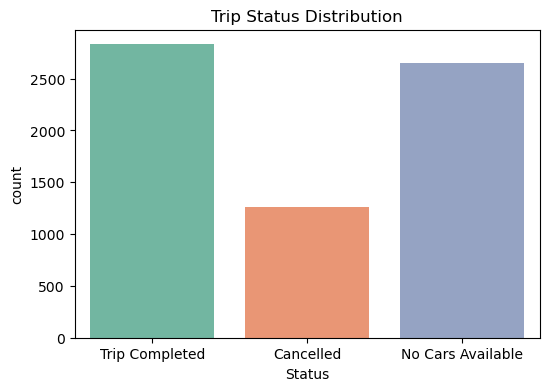

In [203]:
# Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status',hue='Status', palette='Set2')
plt.title("Trip Status Distribution")
plt.show()


#### This countplot(univariate analysis) shows the frequencies of 3 possible trip status' across the entries in the dataset,not from a business POV. ####

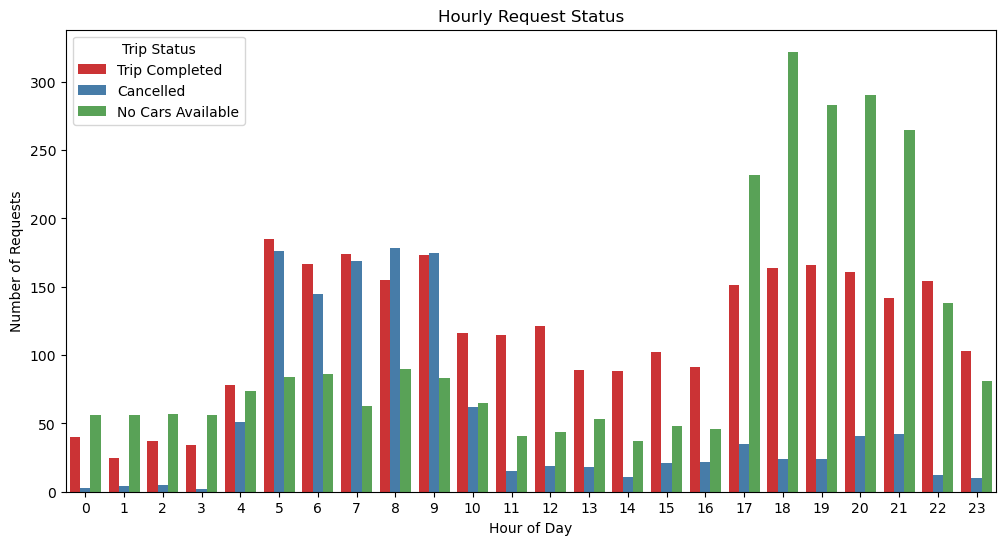

In [293]:
# Convert 'Request Hour' to numeric for proper sorting
df['Request Hour'] = pd.to_numeric(df['Request Hour'])

# Sorting the DataFrame by 'Request Hour'
df = df.sort_values('Request Hour')

# Create the plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Request Hour', hue='Status', palette='Set1', order=sorted(df['Request Hour'].unique()))
plt.title("Hourly Request Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.legend(title="Trip Status")
plt.xticks(range(0, 24))  # Ensure all hours from 0-23 are shown
plt.show()

#### This chart is important for Business Analysis.The insights that we found were that a majority of trips were not possible during evening & night time (6PM to 10PM) because of unavailability of cabs and that the trips were more often cancelled in the early morning time(5AM TO 9AM) thus indicating a demand-supply gap between the users and the cab drivers.So surely focusing on these areas can lead to a +ve business impact. ####
     

<Figure size 1000x500 with 0 Axes>

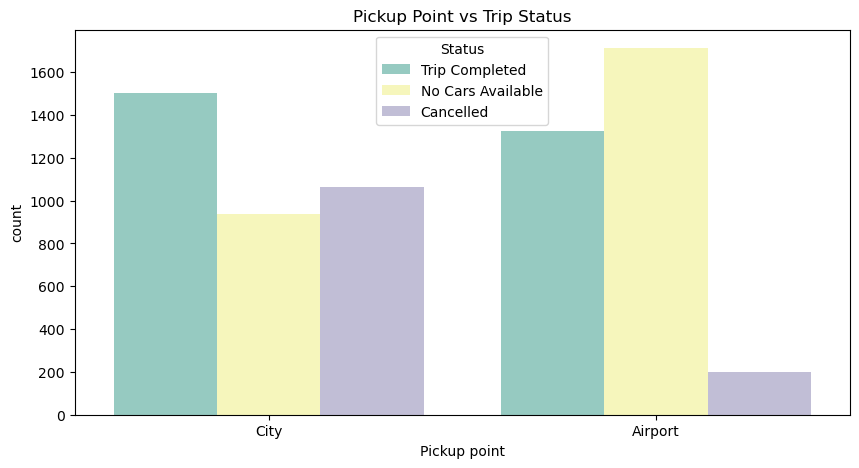

In [209]:
# Pickup Point vs Status
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set3')
plt.title("Pickup Point vs Trip Status")
plt.show()

#### This chart was chosen because it gives a clear comparison of how trip outcomes differ between city and airport pickup points. It highlights that while both locations see a decent number of completed trips, the city has a noticeably higher rate of cancellations, whereas the airport struggles more with car availability. These patterns help us understand where Uber’s service is falling short. If left unaddressed, frequent cancellations in the city and lack of cars at the airport could lead to customer dissatisfaction and lost revenue. On the positive side, these insights can guide Uber to improve driver distribution and reduce service gaps, ultimately leading to a better experience for both riders and drivers. ####

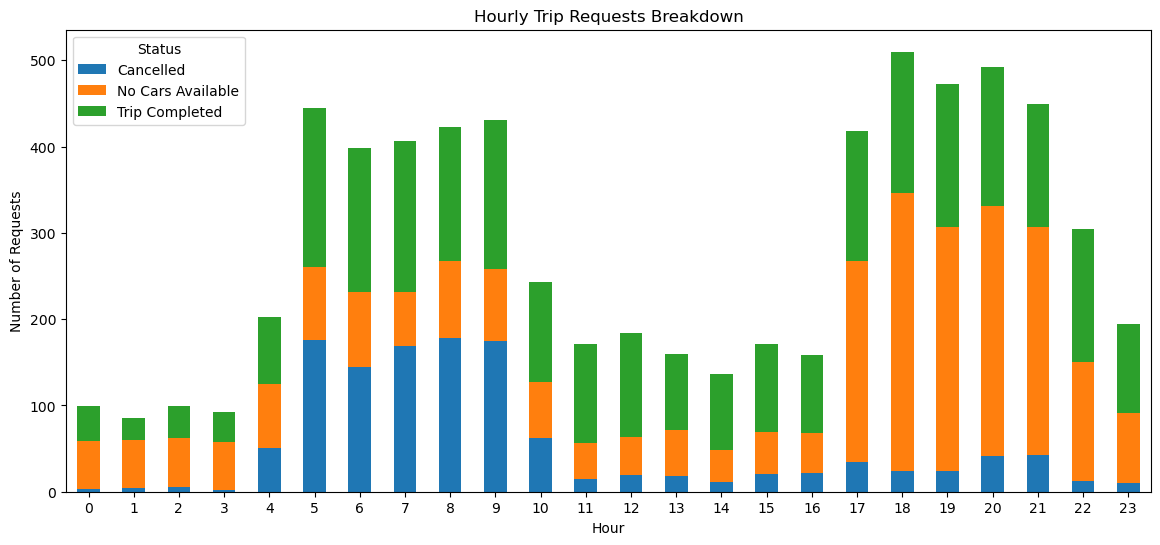

In [210]:
# Heatmap-style Bar of Hourly Demand vs Status
pivot = pd.crosstab(df['Request Hour'], df['Status'])
pivot.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Hourly Trip Requests Breakdown")
plt.xlabel("Hour")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

#### This particular chart was chosen because it tells a very clear and visual story about how trip requests are distributed throughout the day, broken down by whether they were completed, cancelled, or unfulfilled due to no cars being available. It's easy to see at a glance not just when demand is high, but also where things are going wrong. One key insight is that there are two major peaks in demand—early morning (around 5 AM to 9 AM) and evening (5 PM to 9 PM). During these peak hours, especially in the evening, a huge number of requests don’t result in successful trips simply because no cars are available. That’s a major red flag.
#### These insights can be incredibly helpful from a business perspective. They highlight when we need to have more drivers on the road or better predict demand so that we can match supply accordingly. Fixing this gap could directly boost revenue and improve customer experience, which is always good for business. However, if left unresolved, this issue could lead to negative outcomes—frustrated users, a decline in trust, and eventually customer churn. People tend to remember when they couldn’t get a ride when they really needed one. So while the chart points us toward growth opportunities, it also acts as a warning. ####

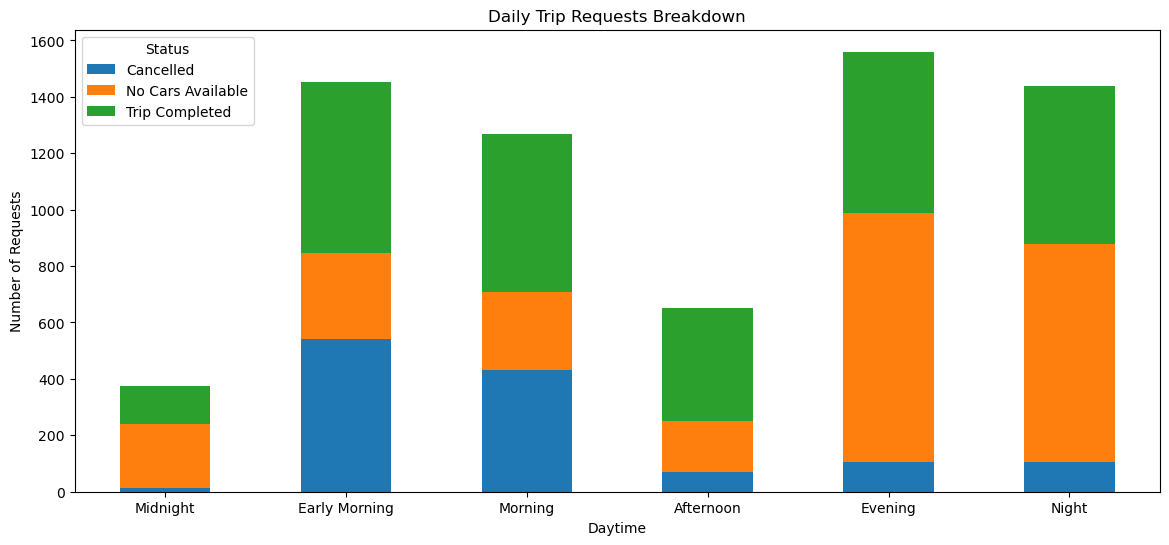

In [278]:
# Heatmap-style Bar of Hourly Demand vs Status
pivot = pd.crosstab(df['Request Timeslot'], df['Status'])
pivot.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Daily Trip Requests Breakdown")
plt.xlabel("Daytime")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

#### This chart was chosen because it breaks the entire day into clear, relatable parts—like "Morning," "Evening," and "Night"—making it easier to understand patterns in trip requests and what actually happens to those requests. It doesn’t just show when people are asking for rides, but also whether those rides were completed, cancelled, or never happened due to no cars being available. One thing that stands out immediately is that evening and night times see the highest number of unfulfilled requests, especially due to car unavailability. That’s a missed opportunity for both customers and the business.
#### On the flip side, early morning and morning periods also show high demand, but what’s worrying is how many of those requests get cancelled. This could be due to drivers not accepting rides or logistical gaps. These insights are extremely useful because they show where the system is underperforming and where there’s room to grow. If the business can improve availability and reduce cancellations during peak periods, it could lead to higher customer satisfaction, more completed rides, and ultimately more revenue. But if nothing is done, the consistently poor service during high-demand times could push users away—something that clearly poses a risk to long-term growth. This chart doesn’t just inform—it nudges action.

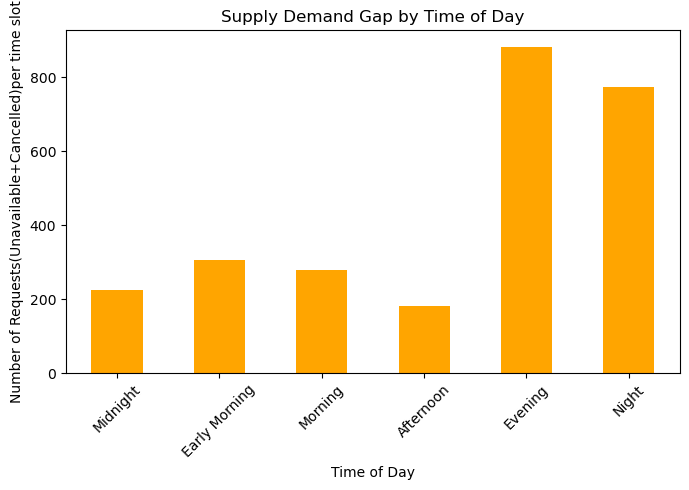

In [222]:
#Gap due to unavailability of rides by Time of Day
plt.figure(figsize=(7,5))
df[df['Status']=='No Cars Available']['Request Timeslot'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Supply Demand Gap by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Requests(Unavailable+Cancelled)per time slot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This chart was chosen because it clearly shows when the service is falling short—specifically, how many ride requests go unfulfilled during each part of the day. The highest gaps are in the evening and night, where hundreds of users don’t get a ride, either because no cars are available or the rides get cancelled. That’s not just a service issue—it’s a major loss in revenue and trust.
#### For the business, this is a clear signal: demand is high, but supply isn’t keeping up. By putting more drivers on the road or improving availability during these hours, the company could easily increase the number of completed trips and make better use of existing demand—without spending extra on ads or promotions.
#### But if this issue is ignored, users may stop relying on the service, especially when they need it the most. This chart helps us pinpoint exactly where we’re losing out and where improvements will have the biggest impact.

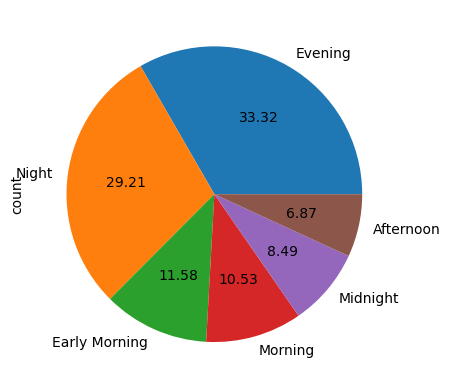

In [244]:
df[df['Status']=='No Cars Available']['Request Timeslot'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

#### On a similar note this bivariate analysis represents the distribution of incomplete trips citing unavailability of rides during different slots of a day.We see around 62 percent of the total such trips were during evening and night time suggesting that the cabs would be busy in fulfiling local demands or citing heavy traffic congestion in that city-airport route during such time or less prices being displayed for such trips that can't compensate for fuel prices over round trips suggesting a negative supply demand relationship.

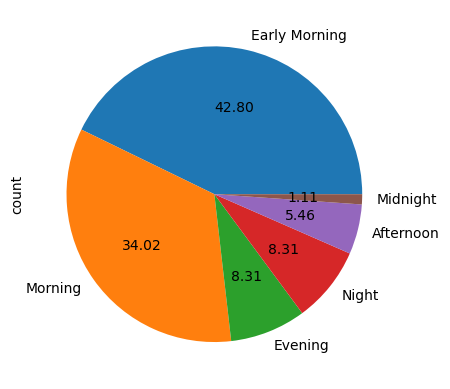

In [245]:
df[df['Status']=='Cancelled']['Request Timeslot'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

#### In this pie chart(bivariate representation) we see distribution of the cancelled trips during different slots of day.We see a record near-77 percent of the cancelled trips around the morning time which may be pointing toward the inrush demand due to offices at such hours or may be a cheap tactic by some drivers so as to kick in surge pricing in which users are bound to pay extra money(profitable for cab drivers,thus dictating a negative business path).

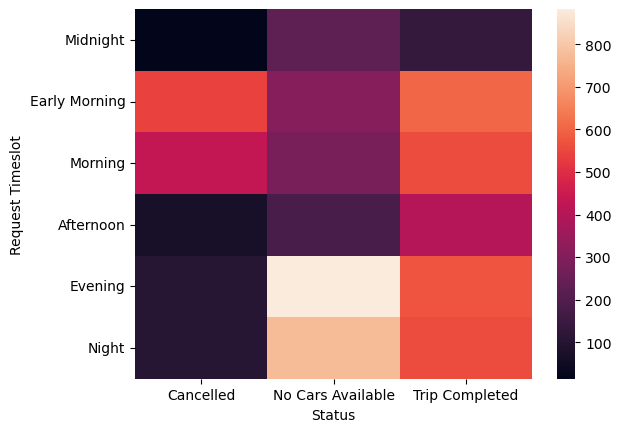

In [274]:
sns.heatmap(pd.crosstab(df['Request Timeslot'],df['Status']))
plt.show()

#### This heatmap was chosen because it clearly shows how trip requests are handled across different times of the day—whether they were completed, cancelled, or couldn’t be served due to no cars being available. The darker colors show higher numbers, and one thing that stands out is the huge number of unserved requests in the evening and night, mostly due to no cars being available.
#### This points to a serious supply issue during high-demand hours. People are often traveling back from work or going out in the evening, but driver availability tends to drop—likely due to fatigue, safety concerns, or lack of incentives. This mismatch leads to lost trips and lost revenue, and even worse, frustrated users who might stop using the app.
#### The chart also shows that early morning and morning have higher cancellations, which could be due to drivers rejecting requests or delays in assigning them. These trends help the business see exactly where service is falling short, so actions like offering driver incentives in the evening or improving reliability in the morning can directly boost both user satisfaction and trip completion.

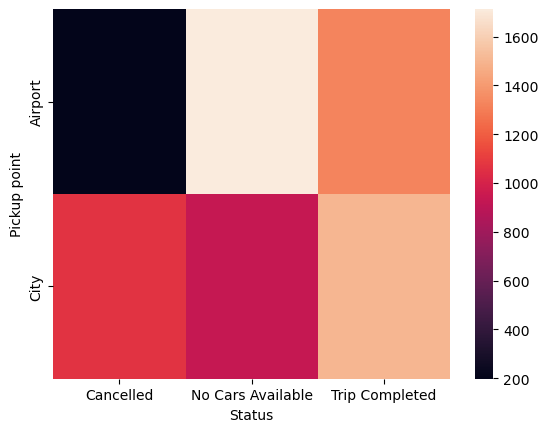

In [275]:
sns.heatmap(pd.crosstab(df['Pickup point'],df['Status']))
plt.show()

#### This heatmap compares trip outcomes based on pickup points—City vs. Airport—and it tells an important story. The airport shows a very high number of unfulfilled requests due to no cars being available, while cancellations are quite low. In contrast, the city has a more balanced mix across all three outcomes, though cancellations are noticeably higher.
#### This suggests a key issue: demand at the airport is high, but supply isn’t keeping up. Many travelers likely need rides upon arrival, but few drivers are available—possibly due to long wait times, restricted entry rules, or lower driver interest in airport pickups. Meanwhile, the city sees more cancellations, which could be from traffic congestion, short-distance fares being rejected, or inefficient trip assignments.
#### From a business standpoint, this chart shows a clear opportunity: better planning around airport pickups, such as holding zones for drivers, higher incentives, or improved queue management. Addressing these gaps could help fulfill more high-value airport rides and reduce missed revenue.

## SOLUTION TO THE BUSINESS OBJECTIVE ##

### Increase Driver Availability During Peak Hours 
 Demand is highest in the evening and night, but supply often falls short. Offer time-based incentives or bonuses to encourage more drivers to come online during these windows. Use live demand heatmaps to direct idle drivers to hotspots.

### Improve Airport Pickup Experience 
 Airport requests are often unserved due to fewer available drivers. Set up holding zones, simplify pickup flow, and offer higher payouts for airport   trips to attract more drivers to these locations.

### Smarter Trip Matching 
 Use intelligent matching systems that consider driver location, traffic, and rider urgency. Prioritize high-wait or high-demand areas and reduce    assignment delays to improve completion rates.

### Reduce Cancellations at City Locations 
 Cancellations in the city may stem from short trips, traffic, or poor driver-rider matching. Allow drivers to set trip preferences, and provide more   transparency about trip details before accepting.

### Collect Real Feedback from Drivers and Riders 
 Run regular feedback loops to understand on-ground challenges. Use this data to fine-tune policies, driver incentives, and app features, building    trust and loyalty on both sides.



## CONCLUSION ##

This project provided a clear, data-driven understanding of how ride requests are handled across different times of day and pickup points, highlighting key issues in supply-demand mismatch, especially during peak hours and at the airport. By analyzing patterns of cancellations, unavailability, and trip completions through various visualizations, we identified critical service gaps that lead to lost revenue and declining user trust.

Our insights point toward actionable strategies—such as boosting driver supply through targeted incentives, improving airport pickup logistics, optimizing trip matching, and reducing cancellations through flexible driver preferences. These suggestions are grounded not just in data, but in real human behavior—focusing on what riders need and what drivers face on the ground.

By addressing these gaps with practical, user-focused solutions, the platform can significantly increase trip fulfillment, enhance customer experience, and drive sustainable business growth. Ultimately, this project serves as both a diagnostic and a roadmap, helping the company align its operations more closely with real-world demand.









